In [83]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, f1_score, accuracy_score , precision_score, recall_score,confusion_matrix

In [84]:
df=pd.read_csv('./dataset/Encoded.csv')
df.shape

(96359, 44)

In [85]:
df['readmitted'].value_counts() 

0    62301
1    34058
Name: readmitted, dtype: int64

In [86]:
from sklearn.utils import resample



not_readmitted = df[df.readmitted==0]
readmitted = df[df.readmitted==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False, 
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])
downsampled.readmitted.value_counts()

0    34058
1    34058
Name: readmitted, dtype: int64

In [88]:
df = pd.DataFrame(downsampled)

In [89]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)

[[ 28883      2      0 ...      0      1      0]
 [ 21604      4      0 ...      0      1      1]
 [ 36859      2      1 ...      0      1      1]
 ...
 [101756      4      0 ...      0      1      1]
 [101760      0      0 ...      0      0      1]
 [101761      0      1 ...      0      0      1]]
[0 0 0 ... 1 1 1]


In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Test case function

In [91]:
def test_model(model):
    # Predict probabilities for test set
    y_prob = model.predict_proba(X_test)[:,1]

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    print('ROC AUC Score:', roc_auc)

    # Make predictions on test set
    y_pred = model.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    print('F1 Score:', f1)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Score:', accuracy)    
    # predict on test set
    y_pred = model.predict(X_test)

    # calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('Precision:', precision)
    print('Recall:', recall)

    cm = confusion_matrix(y_test, y_pred)
    # plot confusion matrix
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.xlabel("Predicted as readmitted")
    plt.ylabel("Actually readmitted")
    plt.show()

LOGISTIC REGRESSION

In [92]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

ROC AUC Score: 0.5256358801305324
F1 Score: 0.5237606336168964
Accuracy Score: 0.5233411626541398
Precision: 0.5328260220829603
Recall: 0.5149985578309778


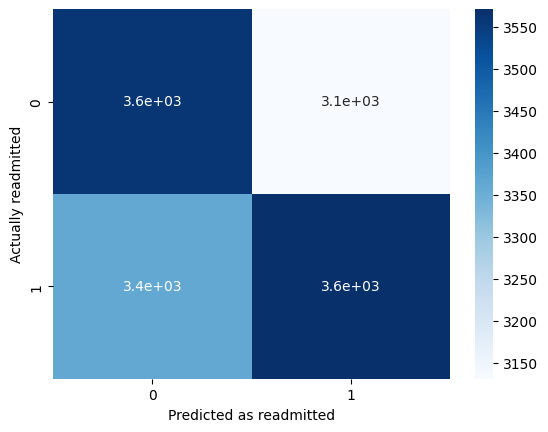

In [93]:
test_model(lg)

In [94]:
#Changing the model a bit
from sklearn.linear_model import LogisticRegression
lg_new=LogisticRegression(solver = "liblinear",class_weight="balanced",random_state = 42)
lg_new.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

ROC AUC Score: 0.6163098537869117
F1 Score: 0.5766714296457848
Accuracy Score: 0.5868320610687023
Precision: 0.6025459688826026
Recall: 0.552927603115085


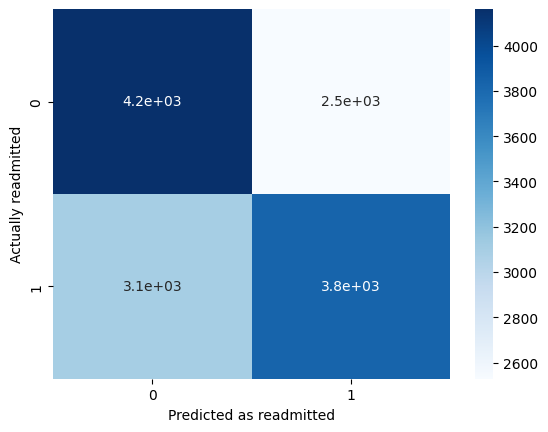

In [95]:
test_model(lg_new)